# Projeto 2 - Ciência dos dados

**Integrantes:**
</p>

- Amanda Carmo

</p>

- Vitor Miada

# <font color='#00878A'>Objetivo do projeto:</font>
<p>
Conduzir análise de dados utilizando técnicas como: regressão linear, decision tree e random forest regression.
<p>
Em nosso projeto iremos analizar a base de dados do circuito de Formula 1, explicado mais a seguir, para fazer a previsão de vitórias de uma partida considerando-se os corredores, escuderias e circuitos.


# O que é Formula 1?

Formula 1 é a mais popular modalidade de automobilismo do mundo. Regulamentada pela FIA (Federação Internacional de Automobilismo), o esporte teve inicio em 1950

 ## Data-Set ##

O dataset é constituido de apenas corridas profissionais de todos os circuitos. O documento, mostra principalmente, quais corredores disputaram, em quais escuderias, em qual circuito e seus resultados. Para facilitamento dos dados, foram denominados identificações para cada corrida, corredor, escuderia, pista, resultados, entre outros.

In [562]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

Foram implementados 7 dataframes para esta análise, pois eram necessários dados variados, como identificação do corredor, identificação do circuito, entre outros.

In [564]:
dados_driver = pd.read_csv('drivers.csv')
dados_quali = pd.read_csv('quali.csv')
dados_result = pd.read_csv('results.csv')
dados_circuit = pd.read_csv('a.csv')
dados_race = pd.read_csv('b.csv')
dados_contresult = pd.read_csv('contresu.csv')
dados_escud = pd.read_csv('cont.csv')

In [565]:
#dados_driver.head()

In [566]:
#dados_quali.head()

In [567]:
dados_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [568]:
dados_circuit.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [569]:
dados_race.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [570]:
dados_escud.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [571]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


____
### Limpando os dados

O primeiro passo a ser feito é o tratamento dos datasets com o objetivo de se ter uma leitura mais limpa, focando-se naquilo que será analisado.

- dados do corredor:

In [572]:
dados_driver = dados_driver.drop(dados_driver.columns[[3, 4, 5, 6, 8]], axis=1) 

In [630]:
dados_driver.head(14)

,driverId,driverRef,number,nationality
0,1,hamilton,44,British
1,2,heidfeld,\N,German
2,3,rosberg,6,German
3,4,alonso,14,Spanish
4,5,kovalainen,\N,Finnish
5,6,nakajima,\N,Japanese
6,7,bourdais,\N,French
7,8,raikkonen,7,Finnish
8,9,kubica,88,Polish
9,10,glock,\N,German


.

- dados da qualificação:

In [574]:
dados_quali = dados_quali.drop(dados_quali.columns[[6, 7, 8]], axis=1) 

In [251]:
dados_quali.head()

,qualifyId,raceId,driverId,constructorId,number,position
0,1,18,1,1,22,1
1,2,18,9,2,4,2
2,3,18,5,1,23,3
3,4,18,13,6,2,4
4,5,18,2,2,3,5


.

- dados da escuderia:

In [252]:
dados_escud = dados_escud.drop(dados_escud.columns[[1, 4]], axis=1) 

.

- dados da corrida:

In [253]:
dados_race = dados_race.drop(dados_race.columns[[2, 5, 6, 7]], axis=1) 

In [254]:
dados_race.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


.

- dados do circuito:

In [255]:
dados_circuit = dados_circuit.drop(dados_circuit.columns[[1, 3, 5, 6, 7, 8]], axis=1) 

In [256]:
dados_circuit.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


.

- Resultados

Escuderia:

In [257]:
dados_contresult =  dados_contresult.drop(dados_contresult.columns[[5]], axis=1).sort_values(by=['raceId'])

In [258]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
3666,4046,1,6,0.0,9,0
3667,4044,1,2,0.0,7,0
3668,4045,1,9,0.0,8,0
3669,4043,1,10,0.0,6,0
3670,4042,1,5,3.0,5,0


Geral:

In [259]:
pontos = dados_contresult.drop(columns = ['constructorStandingsId', 'position', 'constructorId', 'wins'])

In [260]:
pontos.head()

,raceId,points
3666,1,0.0
3667,1,0.0
3668,1,0.0
3669,1,0.0
3670,1,3.0


In [261]:
#dados_result.head(19)

In [262]:
dados_result =  dados_result.drop(dados_result.columns[[5, 7, 9, 10,11,12,13,15,16,17]], axis=1) 

In [577]:
dados_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [264]:
dados_results = dados_result.sort_values(by=['raceId'])

In [578]:
dados_results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
7572,7573,1,1,1,1,\N,20,13
7571,7572,1,5,1,2,\N,19,\N
7570,7571,1,6,3,17,\N,18,18
7569,7570,1,12,4,8,\N,17,19
7568,7569,1,13,6,3,\N,16,15


In [266]:
resultsi = dados_results.merge(dados_race, on = 'raceId', how = 'left')

In [267]:
resultsi.head(30).head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,year,circuitId,name
0,7573,1,1,1,1,\N,20,13,2009,1,Australian Grand Prix
1,7572,1,5,1,2,\N,19,\N,2009,1,Australian Grand Prix
2,7571,1,6,3,17,\N,18,18,2009,1,Australian Grand Prix
3,7570,1,12,4,8,\N,17,19,2009,1,Australian Grand Prix
4,7569,1,13,6,3,\N,16,15,2009,1,Australian Grand Prix


In [268]:
results = resultsi.drop(resultsi.columns[[8,10]], axis=1)

In [632]:
results.head(40)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
0,7573,1,1,1,1,\N,20,13,1
1,7572,1,5,1,2,\N,19,\N,1
2,7571,1,6,3,17,\N,18,18,1
3,7570,1,12,4,8,\N,17,19,1
4,7569,1,13,6,3,\N,16,15,1
5,7568,1,8,6,4,15,15,7,1
6,7567,1,9,2,5,14,14,2,1
7,7566,1,20,9,15,13,13,4,1
8,7565,1,17,9,14,12,12,8,1
9,7564,1,21,10,21,11,11,12,1



### ANALISE EXPLORATORIA

Agora uma analise exploratória para podermos analisar como funcionam os dados em relação a qualificação de corredores e escuderias durante o circuito de Formula 1 de varios anos.


Frequencia Relativa de vitórias de cada escuderia

In [270]:
#taxa de vitoria da escuderia 
dados_taxa = pd.crosstab(dados_contresult['constructorId'],dados_contresult['position'], normalize = "index" )
dados_taxa.head()


position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.014286,0.342857,0.157143,0.000000,0.185714,0.114286,0.057143,0.128571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.152000,0.128000,0.134667,0.164000,0.086667,0.058667,0.058667,0.042667,0.061333,0.066667,...,0.001333,0.002667,0.001333,0.005333,0.010667,0.000000,0.0,0.0,0.0,0.0
4,0.118252,0.061697,0.120823,0.213368,0.167095,0.066838,0.077121,0.043702,0.051414,0.002571,...,0.010283,0.005141,0.017995,0.005141,0.017995,0.002571,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.003731,0.041045,0.164179,0.268657,0.205224,0.287313,0.029851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [271]:
dados_taxa_filtrado = dados_taxa.sort_values(by=1).tail(11)
dados_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
9,0.220280,0.171329,0.269231,0.076923,0.055944,0.094406,0.073427,0.034965,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
180,0.222222,0.240741,0.111111,0.074074,0.111111,0.018519,0.018519,0.000000,0.000000,0.000000,...,0.018519,0.166667,0.018519,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
170,0.224719,0.044944,0.123596,0.213483,0.157303,0.011236,0.000000,0.033708,0.056180,0.000000,...,0.000000,0.011236,0.056180,0.0,0.05618,0.0,0.0,0.0,0.0,0.0
87,0.235294,0.058824,0.352941,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [272]:
dados_taxa_filtrado1 = dados_taxa_filtrado.loc[:,[1]].head(11)

Foi utilizado 11 escuderias para o plot desse gráfico, pois existe uma que possui apenas uma corrida e uma vitória, portanto 100% de vitórias, o que por uma breve analise, seria a "melhor escuderia". Porém, não podemos dizer isso, pois isso não consideraria a quantidade de corridas que as outras escuderias competiram.

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

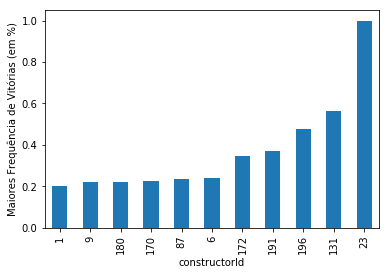

In [273]:
dados_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

Frequencia Relativa de vitórias de cada Corredor

In [274]:
#taxa de vitoria de cada corredor
dados_quali[["driverId", "position"]].head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


In [275]:
corredor_taxa = pd.crosstab(dados_quali['driverId'],dados_quali['position'], normalize = "index" )

In [276]:
corredor_taxa_filtrado = corredor_taxa.sort_values(by=1).tail(11)
corredor_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
driverId,,,,,,,,,,,,,,,,,,,,,
35,0.084337,0.036145,0.072289,0.036145,0.012048,0.036145,0.024096,0.048193,0.096386,0.060241,...,0.000000,0.0,0.012048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,0.086957,0.043478,0.130435,0.217391,0.152174,0.043478,0.086957,0.065217,0.000000,0.021739,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
844,0.142857,0.047619,0.071429,0.119048,0.047619,0.000000,0.023810,0.071429,0.119048,0.023810,...,0.047619,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.145631,0.145631,0.048544,0.038835,0.067961,0.087379,0.097087,0.038835,0.067961,0.038835,...,0.004854,0.0,0.000000,0.0,0.004854,0.000000,0.0,0.0,0.0,0.0
57,0.161290,0.016129,0.129032,0.080645,0.080645,0.048387,0.112903,0.177419,0.096774,0.032258,...,0.000000,0.0,0.000000,0.0,0.000000,0.016129,0.0,0.0,0.0,0.0


In [277]:
corredor_taxa_filtrado1 = corredor_taxa_filtrado.loc[:,[1]].head(11)

O mesmo podemos considerar para o grafico de corredores. Percebe-se que o corredor 102, possui 100% de vitórias, porém com apenas uma corrida registrada.

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

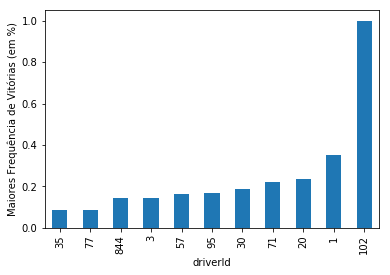

In [278]:
corredor_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

A seguir, foi feita a análise avaliando a pontuação das corridas feitas pelos 10 corredores com maior pontuação ao longo do tempo.

In [605]:
pontuação = dados[['driverId', 'points']]

In [606]:
pontuação.head()

,driverId,points
90,18,0.0
91,18,0.0
92,18,0.0
93,18,0.0
94,18,3.0


In [607]:
ind_points = dados.driverId[dados.points !=0].value_counts(False, ascending = False)

In [635]:
ind_pointsF = ind_points.head(16)

Text(0.5, 1.0, 'Top 10 corredores com maior acúmulo de pontos')

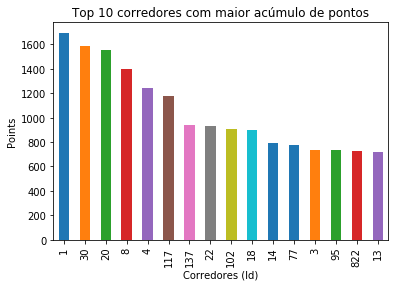

In [636]:
ind_pointsF.plot(kind='bar',legend=False)
plt.ylabel("Points")
plt.xlabel("Corredores (Id)")
plt.title("Top 10 corredores com maior acúmulo de pontos")

Vê-se, desta forma, que o competidor com maior pontuação acumulada ao longo do período de corridas analisado e o corredor de índice 1, ou seja, o Hamilton	

Ademais, também é feita a análise de pontos acumulados para as escuderias:

In [616]:
esc_points = dados.constructorId[dados.points !=0].value_counts(False, ascending = False)

In [626]:
esc_pointsF = esq_points.head(10)

Text(0.5, 1.0, 'Top 10 escuderias com maior acúmulo de pontos')

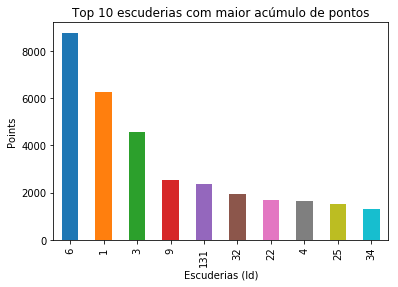

In [627]:
esc_pointsF.plot(kind='bar',legend=False)
plt.ylabel("Points")
plt.xlabel("Escuderias (Id)")
plt.title("Top 10 escuderias com maior acúmulo de pontos")

Relacionando-se os dois gráficos, vê-se uma certa coerência, dado que, à escuderia 6, pertencem os corredores de Id 13 e 8, que estão entre os 16 competidores com maior pontuação, garantindo-se assim para a escuderia a maior pontuação dentre as demais. Além disso, à escuderia de Id 1, pertence o corredor com maior acúmulo de pontuação, deixando-a em segundo lugar. 

###  POSICÕES A SEREM PREVISTAS

De modo a deixar mais interativo, escolha o número de posições que desejam ser previstas

Digite apenas o número de 2 a 10

In [279]:
a = int(input("quantos colocados você quer na previsão?"))
dados = results[results['positionOrder'].map(int) < a]

quantos colocados você quer na previsão?5


In [280]:
dados.head(3)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1


# Random Forest

Esta técnica utilizada pelo grupo se baseia, como sugerido pelo seu nome, em um conjunto de árvores de decisões, assim, com várias ramificações, possibilidades. Cada uma dessas árvores trabalha de forma individual de modo a gerar uma possível predição. O resultado obtido no classificador será validado conforme a predição predominante entre as árvores.

A primeira coisa feita foi separar, com base no dataframe, chamado "dados", separá-lo a fim de se ter uma parte para o treino e uma para os testes.

In [281]:
dados.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
14,7557,1,10,7,10,4,4,6,1
20,7574,2,18,23,22,1,1,1,2


In [282]:
msk = np.random.rand(len(dados)) < 0.8

In [283]:
train = dados[msk]

In [284]:
train.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
14,7557,1,10,7,10,4,4,6,1
20,7574,2,18,23,22,1,1,1,2
31,7575,2,2,2,6,2,2,10,2


In [285]:
test = dados[~msk]
test.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
13,7556,1,15,7,9,3,3,10,1
54,7594,3,20,9,15,1,1,2,17
72,7615,4,20,9,15,2,2,4,3
92,7635,5,22,23,23,2,2,1,4
93,7636,5,17,9,14,3,3,5,4


Selecionando as colunas que importam para a nossa predição

In [286]:
y_train = train['positionOrder']
x_train = train.drop(columns = ['positionOrder', 'position','resultId'])

In [287]:
y_test = test['positionOrder']
x_test = test.drop(columns=['positionOrder', 'position','resultId'])

In [288]:
y_test.dtype

dtype('int64')

In [289]:
y_train.dtype

dtype('int64')

In [290]:
x_test.head()

,raceId,driverId,constructorId,number,rank,circuitId
13,1,15,7,9,10,1
54,3,20,9,15,2,17
72,4,20,9,15,4,3
92,5,22,23,23,1,4
93,5,17,9,14,5,4


In [291]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

O encoder usado acima possibilita conversão de variáveis categóricas em qualitativas. A partir disso, implementa-se o modelo Random Forest

In [292]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0,n_jobs = -1)
model.fit(x_train_encoded, y_train) #treina o modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [293]:
model.score(x_train_encoded,y_train) # taxa de acertos do treinamento (esperado dar 1)

1.0

#### realização dos testes:

A priori, testa-se a **acurácia** do modelo, depois, ele é **testado**

In [294]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [295]:
y_predict = model.predict(x_test_encoded)

In [296]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

In [297]:
accx = acc_RandomForestClassifier *100
print("Acurácia: {}%".format(accx))

Acurácia: 34.20074349442379%


## Matriz de Confusão

Com esta matriz podemos concluir os erros do nosso classificador. Pode-se perceber que o classificador está operando corretamente, pois mesmo com uma porcentagem "baixa", os valores próximos ao esperado estão mais altos que os não esperados.

In [298]:
matriz = confusion_matrix(y_test, y_predict)
matriz

array([[102,  56,  32,  27],
       [ 58,  55,  43,  40],
       [ 28,  64,  53,  66],
       [ 22,  42,  53,  66]], dtype=int64)

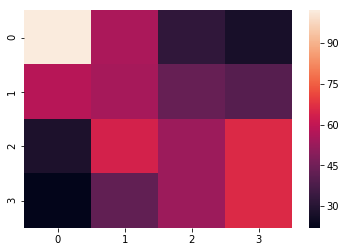

In [299]:
sns.heatmap(matriz)

Substituindo predições no dataset de teste:

In [300]:
test['PositionPredict'] = y_predict

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [301]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [302]:
y_predict_proba

array([[0.03, 0.14, 0.29, 0.54],
       [0.18, 0.29, 0.11, 0.42],
       [0.24, 0.16, 0.05, 0.55],
       ...,
       [0.11, 0.43, 0.35, 0.11],
       [0.17, 0.31, 0.38, 0.14],
       [0.07, 0.56, 0.15, 0.22]])

In [303]:
test['bPredictProba'] = y_predict_proba[:,1]

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [304]:
resultados = test.sort_values(by='bPredictProba')[['driverId', 'constructorId', 'raceId', 'circuitId', 'positionOrder', 'PositionPredict']].head(20)


In [305]:
resultados.sort_values(by = 'PositionPredict')

,driverId,constructorId,raceId,circuitId,positionOrder,PositionPredict
5057,30,6,239,22,2,1
18570,475,170,746,25,3,1
10128,95,3,413,10,3,1
11345,158,4,459,7,2,3
6298,57,1,287,22,3,3
9272,123,22,381,11,3,4
19929,643,105,805,66,4,4
20725,627,154,837,13,3,4
5210,22,17,245,7,2,4
9439,137,32,387,29,3,4


## Logistic Regression

A regressão logística é um método para analisar dados no qual existem uma ou mais variáveis independentes que determinam um resultado. O resultado é medido com uma variável binária.

In [306]:
msk2 = np.random.rand(len(dados)) < 0.8

In [307]:
train2 = dados[msk2]

In [308]:
test2 = dados[~msk2]

In [309]:
y_train2 = train2['positionOrder']
x_train2 = train2.drop(columns=['positionOrder', 'position','resultId'])

In [310]:
y_test2 = test2['positionOrder']
x_test2 = test2.drop(columns=['positionOrder', 'position','resultId'])

In [311]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder2.fit_transform(x_train2.astype(str).values)

In [312]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [313]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [314]:
model2.score(x_train2_encoded,y_train2) # taxa de acertos do treinamento

0.5803218949286365

In [315]:
x_test2_encoded = encoder2.transform(x_test2.astype(str).values)

In [316]:
y_pred2 = model2.predict(x_test2_encoded)

In [317]:
acc = accuracy_score(y_test2, y_pred2)

In [318]:
acc = acc*100
print("Acurácia: {}%".format(acc))

Acurácia: 17.879161528976574%


In [319]:
matriz2 = confusion_matrix(y_test2, y_pred2)
matriz2

array([[73, 59, 30, 30],
       [80, 15, 62, 43],
       [44, 70, 18, 82],
       [29, 57, 80, 39]], dtype=int64)

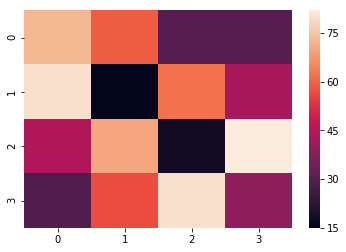

In [320]:
sns.heatmap(matriz2)

## Decision Tree


Vamos implementar agora uma técnica chamada Decision Tree, ela é utilizada para classificadores e regressões, no nosso caso classificação. O objetivo do uso da Decision Tree é criar um modelo que fará a predição do resultado de uma corrida.

Nesta célula, dividiremos o nosso _Dataframe_ em treino e teste, no qual 80% dele será para o treino e 20% para teste

In [321]:
msk3 = np.random.rand(len(dados)) < 0.8

In [322]:
train3 = dados[msk3]

In [323]:
test3 = dados[~msk3]

Aqui, definiremos nosso y, o resultado da nossa previsão e x, as colunas que serão relevantes para a previsão.

In [324]:
y_train3 = train3['positionOrder']
x_train3 = train3.drop(columns=['positionOrder', 'position','resultId'])

In [325]:
encoder3 = OneHotEncoder(handle_unknown='ignore')
x_train3_encoded = encoder.fit_transform(x_train3.astype(str).values)

In [326]:
x_train_encoded

<3297x1486 sparse matrix of type '<class 'numpy.float64'>'
	with 19782 stored elements in Compressed Sparse Row format>

In [327]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train3_encoded, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [328]:
y_test3 = test3['positionOrder']
x_test3 = test3.drop(columns=['positionOrder', 'position','resultId'])

In [329]:
x_test3_encoded = encoder.transform(x_test3.astype(str).values)

In [330]:
y_pred3 = regressor.predict(x_test3_encoded)

In [331]:
acc3 = accuracy_score(y_test3, y_pred3)

In [332]:
acc3 = acc3* 100 
print("Acurácia: {}%".format(acc3))

Acurácia: 36.36363636363637%


In [333]:
matriz3 = confusion_matrix(y_test3, y_pred3)
matriz3

array([[106,  45,  35,  18],
       [ 48,  50,  53,  34],
       [ 33,  47,  67,  59],
       [ 37,  35,  74,  73]], dtype=int64)

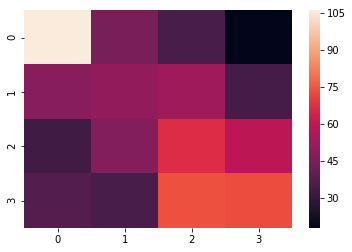

In [334]:
sns.heatmap(matriz3)

## Conclusões:


O término deste projeto, surgiram varias conclusões. Podemos perceber que a análise exploratoria nos gerou dados que numa primeira análise nos gerasse conclusões erradas. Por exemplo, Dado as frequencias de primeiro lugar de cada corredor ou escuderia, não nos garante que o mesmo seja o melhor, pois uma escuderia que alcançasse uma taxa de segundos ou terceiros lugares muito maior que uma de primeiros e ultimos, seria sim considerada melhor que essa; o mesmo serve para corredores; um corredor com varios segundos ou terceiros colocados seria muito melhor que um que alcançasse apenas primeiros e ultimos.

Outra conclusão, é que mesmo com um vasto numero de dados, a acurácia do estudo não é muito alta. Isso se deve ao fator da dificuldade de selecionar os melhores dentre varias posições, por exemplo, é muito mais facil prever algo com 3 resultados do que algo com 8 resultados. Nosso modelo, quanto menos colocações é dito para ele prever, mais acurácia ele terá.

Algo que também dificulta a previsão, é o tempo. Com o passar do tempo, muitas tecnologias foram avançando, e portanto, os carros começaram a ser cada vez melhores. Por conta disso, não poderiamos considerar a variavel tempo por circuito, tempo de pit-stop, melhor volta, o que melhoraria nosso classificador.